In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import argparse
import imutils
import math

WORKPATH = "D:/GameProjects/Kartrider/SmartKartRider"
RAW_DATA_PATH = WORKPATH + "/raw_data/US"

In [21]:
class ShapeDetector:
    def __init__(self):
        pass

    def detect(self, c):
        # 初始化形状名称并近似轮廓
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        print("peri: ", peri)
        approx = cv2.approxPolyDP(c, 0.10* peri, True)
        # approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        # 如果形状是一个三角形，它将有3个顶点
        if len(approx) == 3:
            shape = "triangle"
        # 如果形状有4个顶点，它要么是正方形，要么是矩形
        elif len(approx) == 4:
            # 计算轮廓的包围框，并使用包围框计算高宽比
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            # 正方形的长宽比大约等于1，否则，形状就是矩形
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        # 如果形状是一个五边形，它将有5个顶点
        elif len(approx) == 5:
            shape = "pentagon"
        # 否则，我们假设形状是一个圆
        else:
            shape = "circle"
        # 返回形状的名称
        return shape, approx

In [15]:
def angle_of_vector(v1, v2):
    pi = math.pi
    vector_prod = v1[0] * v2[0] + v1[1] * v2[1]
    length_prod = math.sqrt(pow(v1[0], 2) + pow(v1[1], 2)) * math.sqrt(pow(v2[0], 2) + pow(v2[1], 2))
    cos = vector_prod * 1.0 / (length_prod * 1.0 + 1e-6)
    return (math.acos(cos) / pi) * 180

In [29]:
target_size = (100, 100)
img = cv2.resize(cv2.imread(RAW_DATA_PATH + '/SmallMap/6.png')[80:110, 85:115], target_size)

In [30]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = np.array([80, 50, 100]) #BGR
upper = np.array([120, 255,255])
mask = cv2.inRange(hsv, lower, upper)
res = cv2.bitwise_and(img, img, mask=mask)
canny = cv2.Canny(mask,50,50)

peri:  261.03657710552216
[[ 6 73]
 [94 82]
 [55 19]]
triangle [[ 6 73]
 [94 82]
 [55 19]]
peri:  44.82842707633972
[[ 0  0]
 [21  1]]
circle [[ 0  0]
 [21  1]]


array([-10.5,  -0.5])

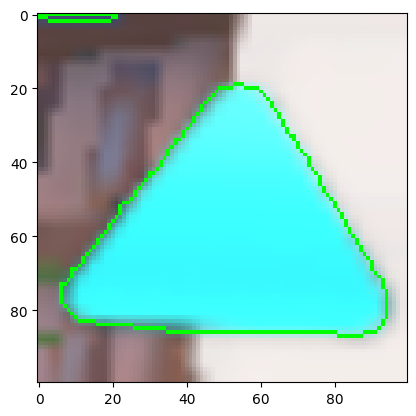

In [31]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()
final_img = img.copy()
for c in cnts:
    # 计算轮廓的中心，然后仅使用轮廓检测形状的名称
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) )
    cY = int((M["m01"] / M["m00"]) )
    shape, train_points = sd.detect(c)
    train_points = train_points.reshape(len(train_points), -1)
    # 将轮廓(x, y)坐标乘以调整比例，然后在图像上绘制轮廓和形状的名称
    print(train_points)
    cv2.drawContours(final_img, [c], -1, (0, 255, 0), 1)
    # cv2.putText(final_img, "0", (train_points[0, 0]-3, train_points[0, 1]), cv2.FONT_HERSHEY_SIMPLEX,
    #             0.2, (255, 255, 255), 1)
    #
    # cv2.putText(final_img, "1", (train_points[1, 0]-3, train_points[1, 1]), cv2.FONT_HERSHEY_SIMPLEX,
    #         0.2, (255, 255, 255), 1)
    #
    # cv2.putText(final_img, "2", (train_points[2, 0]-3, train_points[2, 1]), cv2.FONT_HERSHEY_SIMPLEX,
    #         0.2, (255, 255, 255), 1)
    print(shape, train_points)
    plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
k_left_vet_index, k_up_vet_index = np.argmin(train_points.reshape(len(train_points), -1), axis = 0)
k_right_vet_index  = np.argmax(train_points.reshape(len(train_points), -1), axis = 0)[0]
k_left_vet = train_points[k_left_vet_index]
k_right_vet = train_points[k_right_vet_index]
k_up_vet = train_points[k_up_vet_index]
k_mid_down_vet = (k_right_vet + k_left_vet)/2
k_dir_vet = k_up_vet - k_mid_down_vet
up_norm = np.array([0, -1])
k_dir_vet

In [32]:
angle_of_vector(k_dir_vet, up_norm)

87.2736892656444

In [33]:
train_points

array([[ 0,  0],
       [21,  1]], dtype=int32)